##### **f(x)** Funciones útiles

In [294]:
def resumen_por_columna(df,cols):
    pd_series = df[cols]

    # elementos distintos
    l_unique = pd_series.unique()

    # elementos vacios

    l_vacios = pd_series[pd_series.isna()]

    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })

    return df_info

#####📁 Importación Data

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [340]:
from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/MyDrive/MAT281/Proyecto/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
# Carga de datos
df_train = pd.read_csv(path+"train.csv")
df_test = pd.read_csv(path+"test.csv")

In [346]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [343]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Análisis Exploratorio de Datos (EDA)
Iniciamos con una inspección de los datos para conococer la data y la información perdida.

In [300]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [301]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [302]:
# Ajustamos texto
df_train.columns = df_train.columns.str.lower().str.strip()
df_test.columns = df_test.columns.str.lower().str.strip()

df_train["passengerid"] = df_train["passengerid"].str.replace("_","")
df_test["passengerid"] = df_test["passengerid"].str.replace("_","")

# Printeamos información
print("           -> df_train <-\n")
df_train.info()
print("\n")

print("           -> df_test <-\n")
df_test.info()
print("\n")

           -> df_train <-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


           -> df_test <-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns 

Notamos que no existen atributos con nombre indefinido. La data se compone de las mismas columnas, salvo el target, en este caso, "_Transported_" en la data de entrenamiento. Además tenemos categóricos y continuos, y datos NaN perdidos entre ellos.


El ID y el nombre no serán objeto de estudio por ahora, pues sólo nos interesa analizar atributos cuya unicidad de tipo no supere una cantidad grande. Así mismo dejaremos de lado la cabina en donde aloja la persona.

In [303]:
not_usefull_atr = ['name', 'passengerid', 'cabin']
print("                     -> df_train <-\n")
for i in range(3):
    print("cantidad de elementos distintos para '"+str(not_usefull_atr[i])+"': ",len(df_train[str(not_usefull_atr[i])].unique().tolist()), "\n")


                     -> df_train <-

cantidad de elementos distintos para 'name':  8474 

cantidad de elementos distintos para 'passengerid':  8693 

cantidad de elementos distintos para 'cabin':  6561 



Utilizaremos sólo el ID como _primary key_.

In [304]:
# Definimos tipo columnas
categoricals = df_test.columns.drop(['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', "cabin", "passengerid", "name"])
continues = df_test.columns.drop(categoricals).drop(["cabin","passengerid","name"])

predictors = df_train.columns.drop(["cabin","passengerid","name"])

In [305]:
# Predictores no-útiles
df_train = df_train.drop(['name'], axis=1)
df_test = df_test.drop(['name'], axis=1)

df_train['passengerid'] = pd.to_numeric(df_train['passengerid'], errors='coerce') # Se pasa a continuo
df_test['passengerid'] = pd.to_numeric(df_test['passengerid'], errors='coerce')

# Asignamos nuevo índice
index_train = df_train["passengerid"].tolist()
index_test = df_test["passengerid"].tolist()

df_train = df_train.reset_index(drop=True)
df_train = df_train.drop(["passengerid"], axis=1)
df_train.index = index_train

df_test = df_test.reset_index(drop=True)
df_test = df_test.drop(["passengerid"],axis=1)
df_test.index = index_test

df_train

,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
101,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
201,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
301,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
302,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
401,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
927601,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
927801,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
927901,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
928001,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


##### Visualización Descriptiva

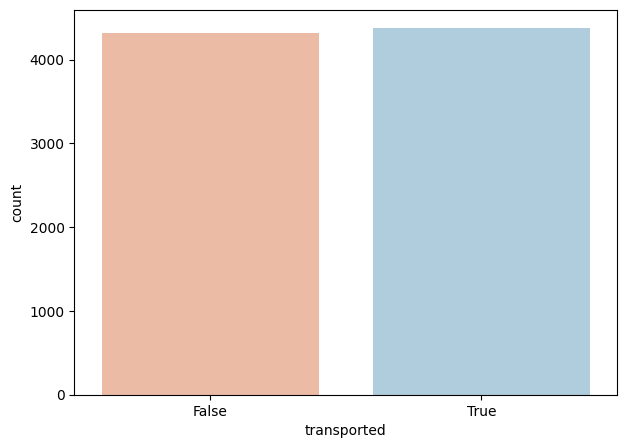

In [306]:
# Target: Transportado
plt.style.use('default')
plt.figure(figsize=(7,5))

count_data = df_train.groupby('transported').size().reset_index(name='count')

plotting = sns.barplot(
    x="transported",
    y="count",
    data=count_data,
    palette="RdBu",
    linewidth=3
)

El target está distribuido en proporciones similares. Veamos los **atributos continuos**:

Text(0.5, 0, 'Age (years)')

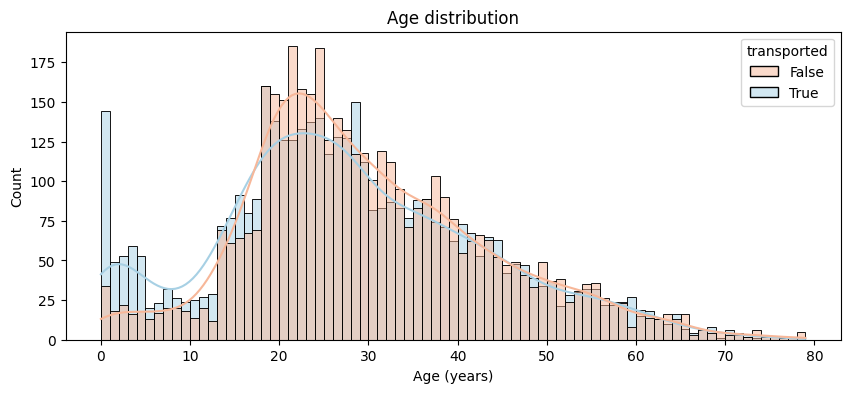

In [307]:
# Atributo de edad
plt.figure(figsize=(10,4))

sns.histplot(data=df_train,
             x='age',
             hue='transported',
             binwidth=1,
             palette="RdBu",
             kde = True)

plt.title('Age distribution')
plt.xlabel('Age (years)')

La gran mayoria de los niños entre 0 a 5 años fueron transportados.
Jóvenes de 19 a 25 años fueron notoriamente más no-transportados, que transportados.

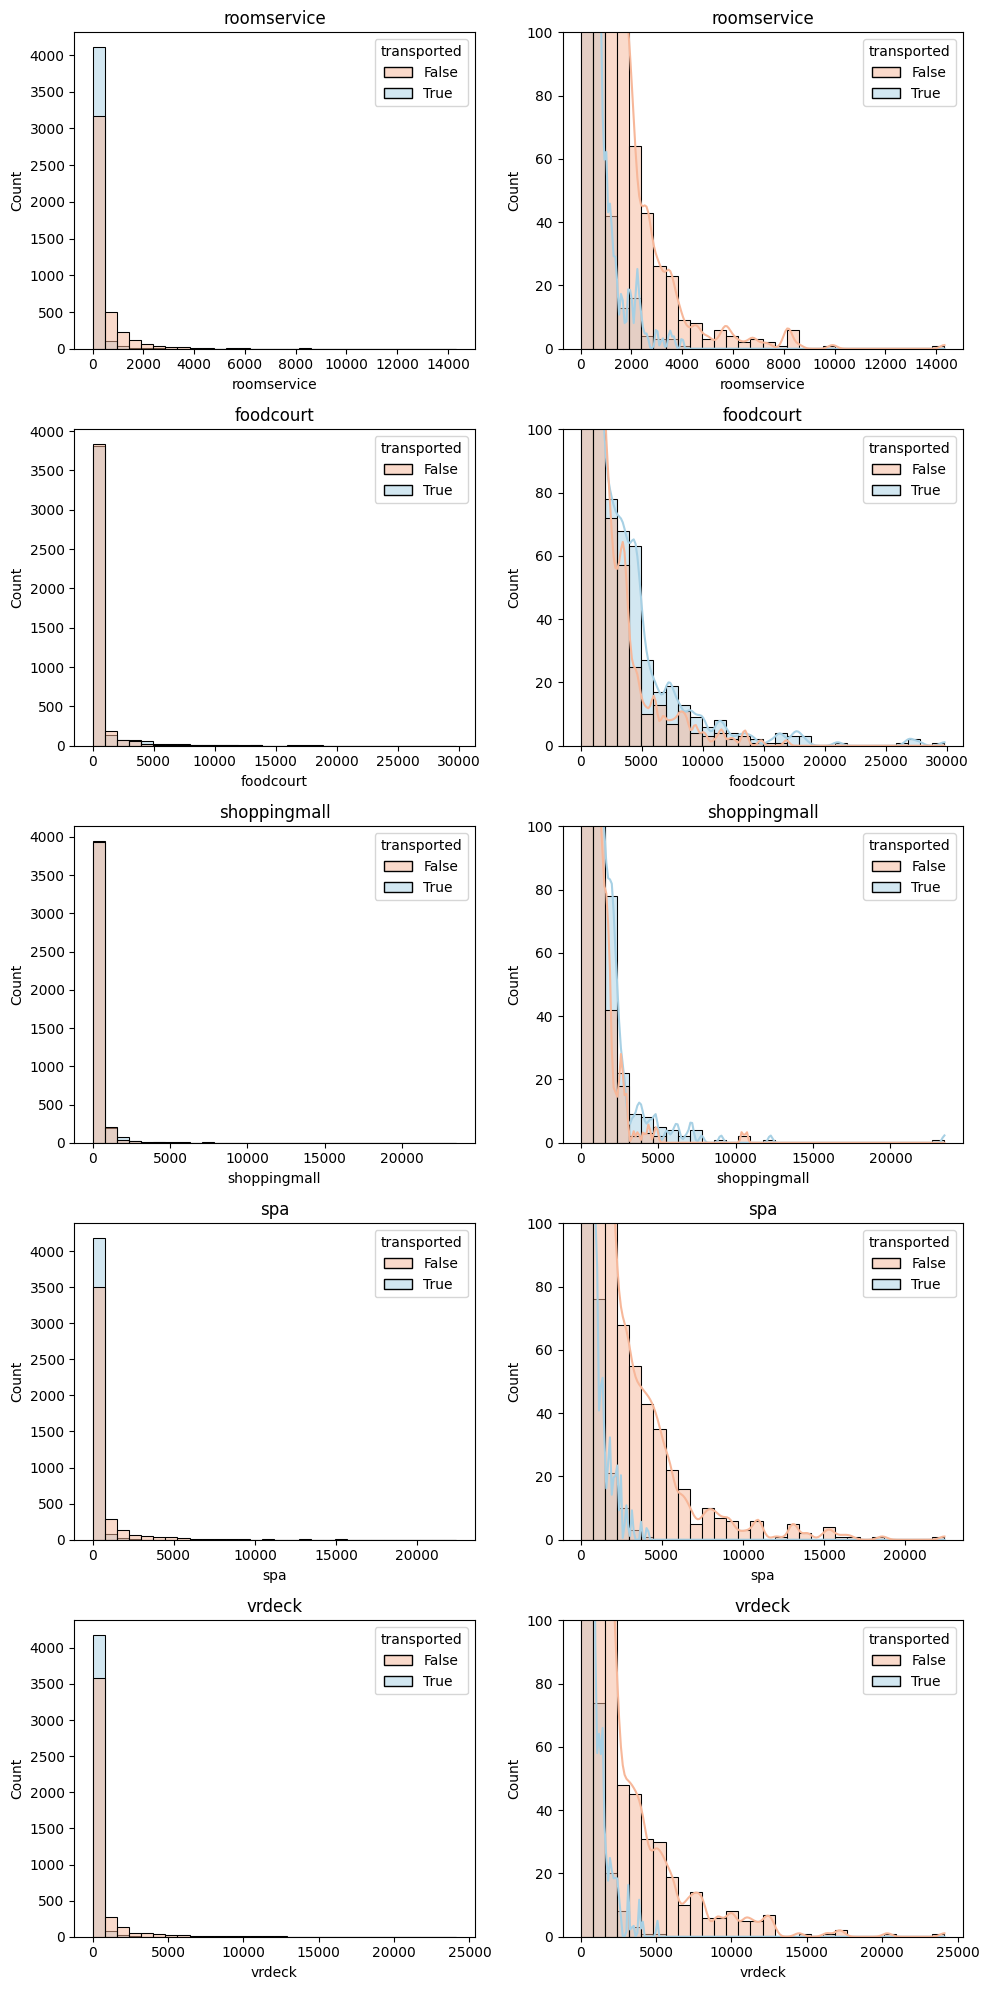

In [308]:
# Atributos de costos
exp_features = continues.drop(["age"])

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_features):
    # Plot original
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train,
                 x=var_name,
                 axes=ax,
                 bins=30,
                 palette="RdBu",
                 hue='transported')
    ax.set_title(var_name)

    # Plot acercado
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train,
                 x=var_name,
                 axes=ax,
                 bins=30,
                 kde = True,
                 palette="RdBu",
                 hue='transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Notamos dos cosas de cada gráfico:
* vista macro: Personas que gastaron de 0 a 850 dólares en las comodidades, en general, fueron levemente más transportados. Gran parte de la población hizo gastos en este rango.
* vista micro: Personas que gastaron de 850 a 10000 dólares en las comodidades: SPA, Servicio a la pieza y entretenimiento de Realidad Virtual, fueron menos transportados.

Veamos ahora los **atributos categóricos**:

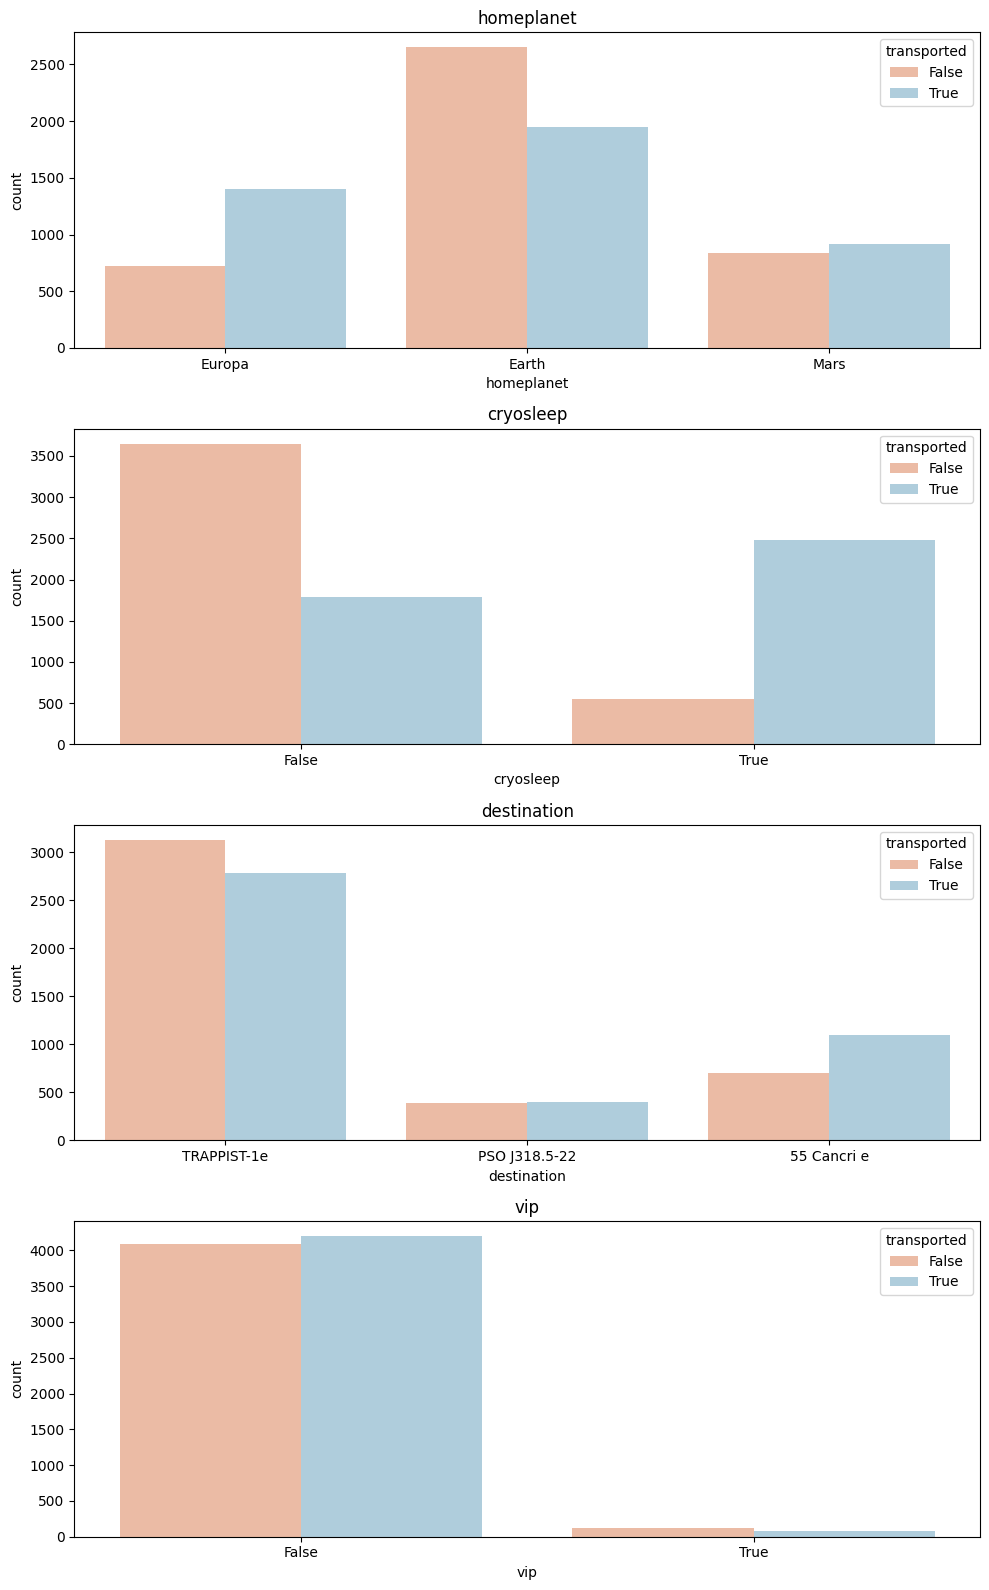

In [309]:
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(categoricals):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train,
                  x=var_name,
                  axes=ax,
                  palette="RdBu",
                  hue='transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Los atributos de lugar de origen, si está en criosueño, y destino, denotan una diferencia que permite discernir si la persona fué transportada o no. En particular, estár en criosueño es un predictor que indica información relevante, dada la diferencia proporcional que se dá entre las posibles opciones de estar en criosueño, y si fue transportado.

El atributo VIP no nos aporta mucha información, pues tanto para quienes contrataron el servicio, como para los que no, fueron similarmente transportados y no transportados.

Para eliminar el riesgo de promoveer soluciones imprecisas, dada a la similitud en los datos, se decide eliminar el atributo.

In [310]:
pred_n_target = predictors.drop("vip")
predictors = predictors.drop(["vip", "transported"])

categoricals = predictors.drop(continues) # Actualizamos datos

# Filtramos la data
df_train = df_train[pred_n_target]
df_test = df_test[predictors]

####♻️ Corrección Data Errada

Según la naturaleza de cada dato, se optará por operar en los datos NaN.

Concatenaremos las datas df_train y df_test para facilitar el proceso de la limpieza de datos.

In [311]:
# n° de fila por separaremos las datas, luego
m = df_train.shape[0]
m

8693

In [312]:
# Extraemos el target
y = df_train['transported'].copy().astype(int)
X = df_train.drop('transported', axis=1).copy()

# Concatenamos dataframes
df = pd.concat([X, df_test], axis=0).reset_index(drop=True)

Así, el porcentaje de NaN será:

In [313]:
# Porcentaje de NaN
frames = []

for col in predictors:
    aux_df = resumen_por_columna(df,col)

    frames.append(aux_df)

df_info = pd.concat(frames).reset_index(drop=True)

df_info['% vacios'] = df_info['vacios']/len(df)

df_info

,columna,unicos,vacios,% vacios
0,homeplanet,4,288,0.022205
1,cryosleep,3,310,0.023901
2,destination,4,274,0.021126
3,age,81,270,0.020817
4,roomservice,1579,263,0.020278
5,foodcourt,1954,289,0.022282
6,shoppingmall,1368,306,0.023593
7,spa,1680,284,0.021897
8,vrdeck,1643,268,0.020663


para reemplazar los NaN en los atributos **continuos**, consideraremos la moda de cada valor. Para atributos **categóricos**, nos basta colocarlo como no-identificado.

In [314]:
# Atributos continuos
for atr in continues:
    df[atr].fillna(df[atr].mode().iloc[0], inplace=True)

# Atributos categóricos
for atr in categoricals:
    df[atr] = df[atr].fillna("No identificado")

Una vez eliminado los datos NaN, analizamos los datos por separado.

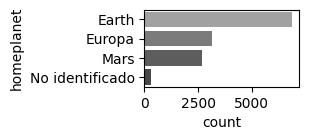

In [315]:
# 'homeplanet'
plt.style.use('default')
plt.figure(figsize=(2,1))

plotting = sns.countplot(
    y="homeplanet",
    data=df,
    order=df['homeplanet'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)
ax.set_title("homeplanet: df_train")
plt.show()

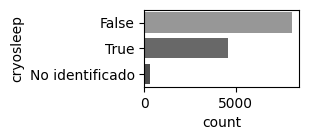

In [316]:
# 'cryosleep'
plt.style.use('default')
plt.figure(figsize=(2,1))

plotting = sns.countplot(
    y="cryosleep",
    data=df,
    order=df["cryosleep"].value_counts().index,
    palette="Greys_d",
    linewidth=3
)
plt.show()

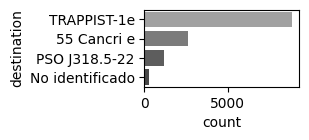

In [317]:
# 'destination'
plt.style.use('default')
plt.figure(figsize=(2,1))

plotting = sns.countplot(
    y="destination",
    data=df,
    order=df["destination"].value_counts().index,
    palette="Greys_d",
    linewidth=3
)
plt.show()

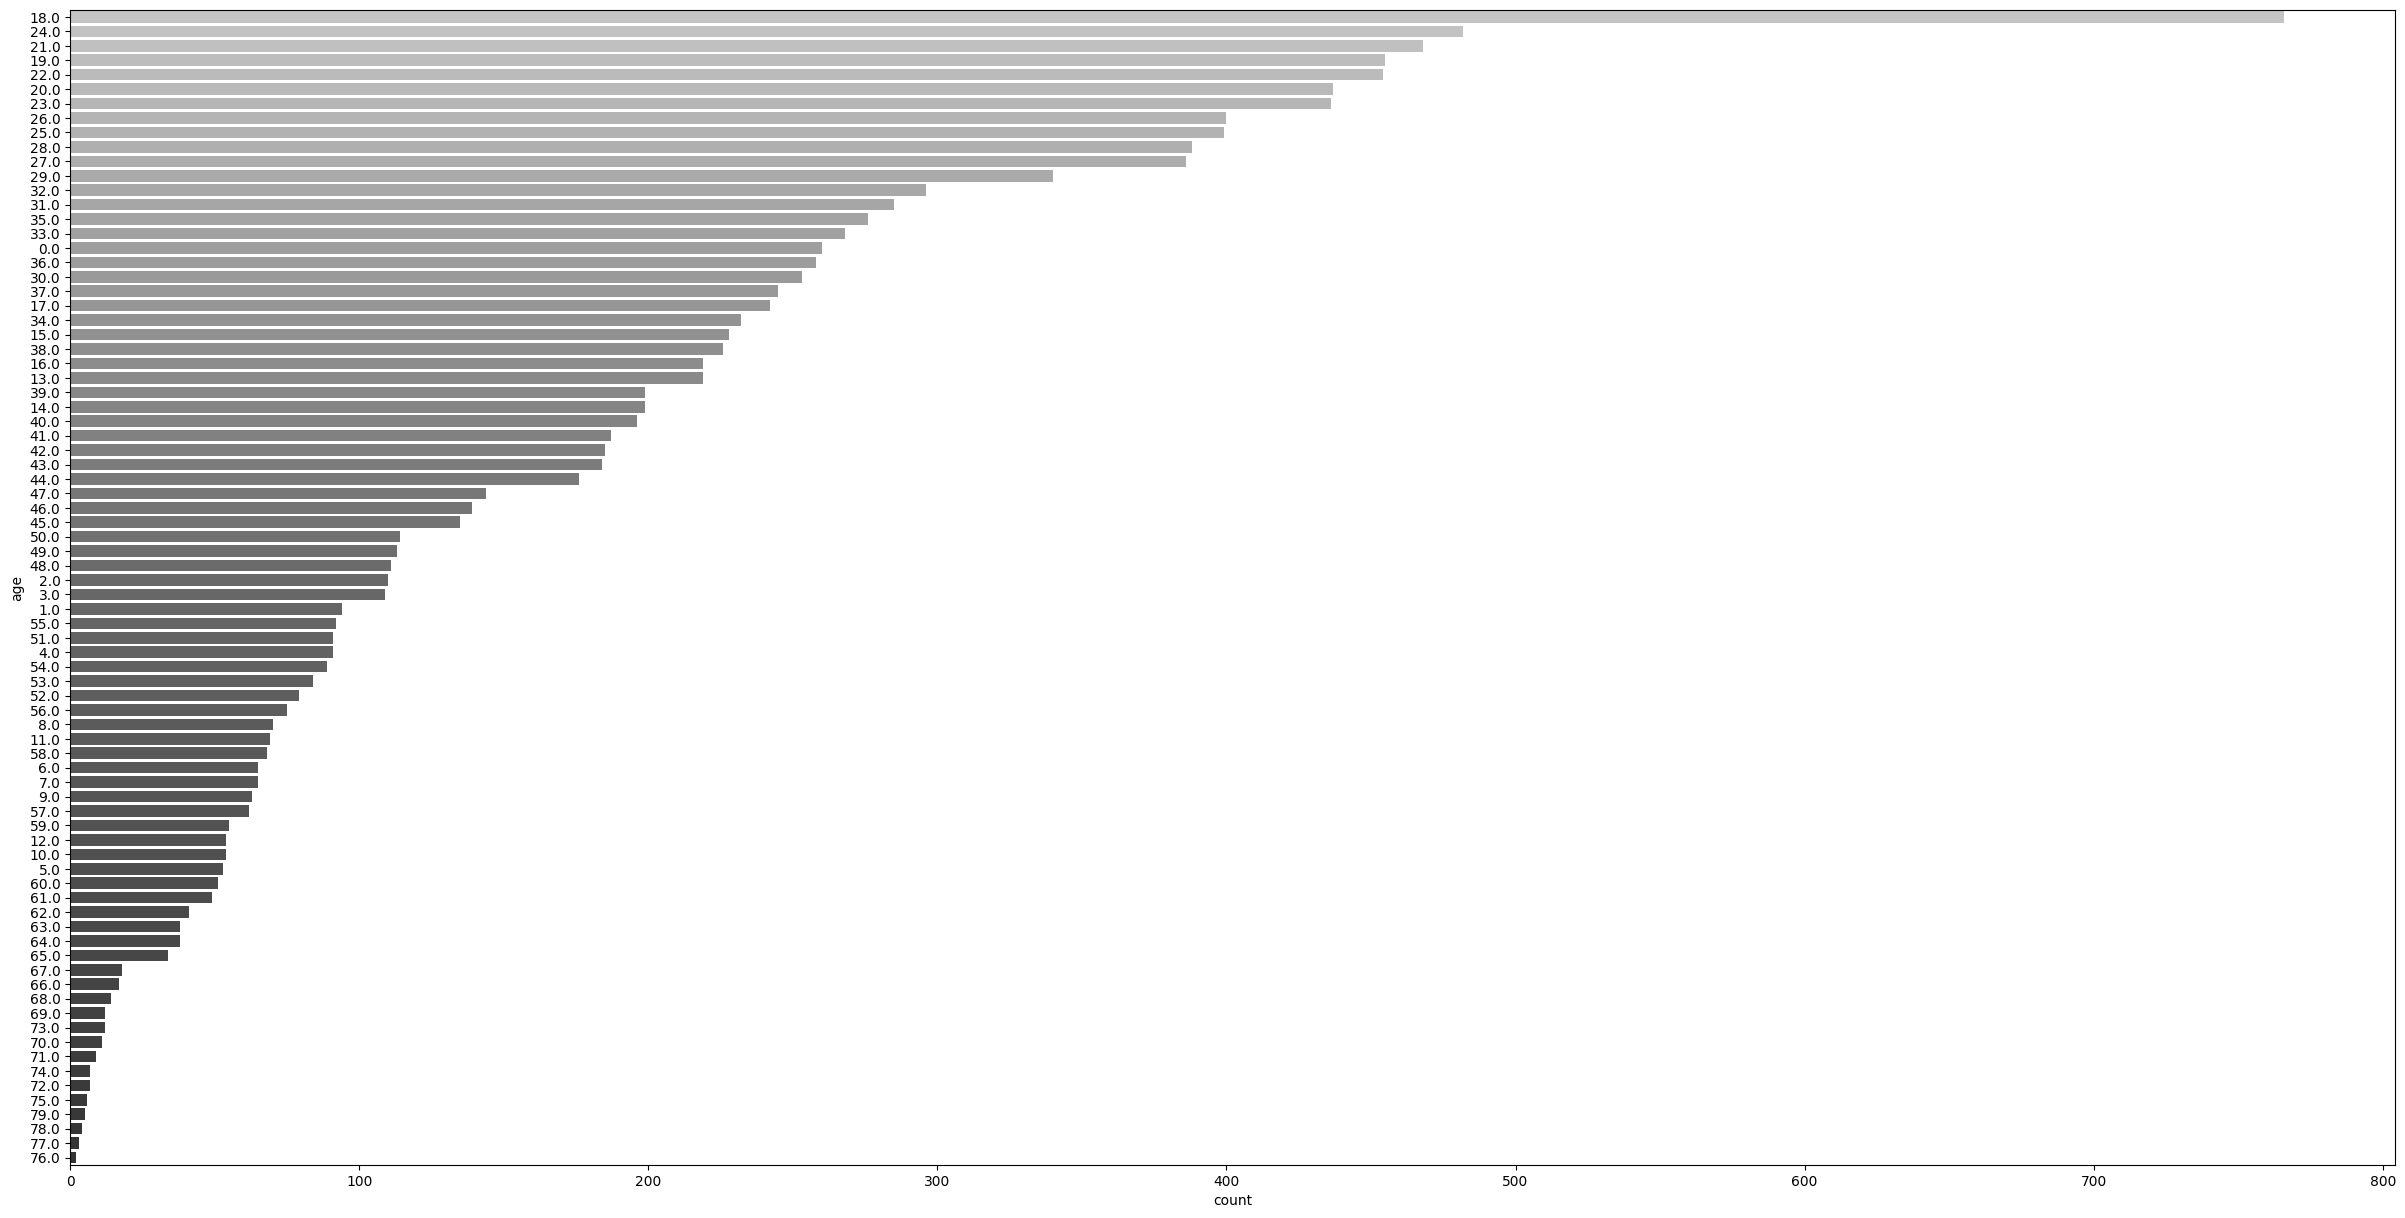

In [318]:
# 'age'
plt.style.use('default')
plt.figure(figsize=(30,15))

plotting = sns.countplot(
    y='age',
    data=df,
    order=df['age'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)
plt.show()

Notamos que no existen valores erróneos. No hay necesidad de cambiar la data.

#### Pre-procesamiento de Datos

##### Normalización de los datos

Estandaricemos y normalicemos los datos con StandarScaler() y OneHotEncoder() respectivamente.

In [319]:
# Separación de data
df_train = df.iloc[:m].reset_index().drop('index', axis=1)
df_train.index = index_train

df_test = df.iloc[m:].reset_index().drop('index', axis=1)
df_test.index = index_test

In [320]:
df_info = pd.DataFrame({df_info["columna"].name: df_info["columna"], df_info["unicos"].name: df_info["unicos"]})
df_info

,columna,unicos
0,homeplanet,4
1,cryosleep,3
2,destination,4
3,age,81
4,roomservice,1579
5,foodcourt,1954
6,shoppingmall,1368
7,spa,1680
8,vrdeck,1643


Para los atributos continuos aplicaremos StandarScaler:

In [321]:
# Atributos continuos
scaler = StandardScaler()
columns = continues

df_train[columns] = scaler.fit_transform(df_train[columns])
df_train[columns]

df_test[columns] = scaler.fit_transform(df_test[columns])
df_test[columns]

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck
1301,-0.101445,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
1801,-0.668426,-0.357339,-0.277879,-0.312173,2.287504,-0.246712
1901,0.182045,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
2101,0.678153,-0.357339,4.121518,-0.312173,-0.104002,0.226648
2301,-0.597554,-0.340723,-0.283840,0.832122,-0.267841,-0.246712
...,...,...,...,...,...,...
926602,0.394663,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
926901,0.961644,-0.357339,0.277095,-0.281538,-0.258790,-0.130193
927101,-0.739299,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
927301,-0.739299,-0.357339,1.491019,-0.312173,-0.267841,0.176479


In [322]:
# Atributos categóricos
columns = categoricals

df_train_cat_dumm = pd.get_dummies(df_train[columns], columns=columns, drop_first=True)
df_test_cat_dumm = pd.get_dummies(df_test[columns], columns=columns, drop_first=True)

df_train = pd.concat([df_train[continues], df_train_cat_dumm], axis=1)
df_test = pd.concat([df_test[continues], df_test_cat_dumm], axis=1)

In [323]:
df_train.head()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,homeplanet_Europa,homeplanet_Mars,homeplanet_No identificado,cryosleep_True,cryosleep_No identificado,destination_No identificado,destination_PSO J318.5-22,destination_TRAPPIST-1e
101,0.720854,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1,0,0,0,0,0,0,1
201,-0.319336,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,0,0,0,0,0,0,0,1
301,2.038427,-0.268001,1.959998,-0.283579,5.695623,-0.219796,1,0,0,0,0,0,0,1
302,0.304778,-0.333105,0.523010,0.336851,2.687176,-0.092818,1,0,0,0,0,0,0,1
401,-0.874104,0.125652,-0.237159,-0.031059,0.231374,-0.261240,0,0,0,0,0,0,0,1


  Por último, creamos nuestro conjunto de validación y testeo:

In [326]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(df_train,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

#### Selección de modelo

Utilizaremos hiperparámetros para los cuatro modelos en cuestión, los cuales se identifican con el Grid:

In [327]:
# Clasificadores
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0)
}

# Grids (hiperparámetros)
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

# Diccionario de Grid
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid
    }

Por último, evaluaremos el modelo:

In [328]:
i = 0
clf_best_params = classifiers.copy()
valid_scores = pd.DataFrame({'Classifer':classifiers.keys(), # Creamos la data de puntajes
                             'Validation accuracy': np.zeros(len(classifiers)),
                             'Training time': np.zeros(len(classifiers))})

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Entrenamiento y Testeo
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1] = clf.score(X_valid, y_valid)

    # Guardamos el mejor modelo
    clf_best_params[key] = clf.best_params_

    # Printeamos datos
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)

    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Model: LogisticRegression
Training time (mins): 0.04

Model: KNN
Training time (mins): 0.1

Model: SVC
Training time (mins): 7.3

Model: RandomForest
Training time (mins): 1.23



In [344]:
# Resultados
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.784934,0.04
1,KNN,0.774008,0.10
2,SVC,0.779758,7.30
3,RandomForest,0.783784,1.23


Los modelos con mayor precisión son el **LogisticRegression** y **RandomForest**. Veamos cuales son los mejores hiperparámetros que nos permite determinar cuales son los mejores.

In [332]:
# Mejores hiperparámetros
clf_best_params

{'LogisticRegression': {'C': 0.25, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10, 'n_estimators': 250}}

#### Métricas y resultados

Dado a que ya hemos utilizado datos de la data original, ahora ocupemos los de la data de testeo para predecir los valores y concluir el entrenamiento supervisado.

In [335]:
# Clasificadores
best_classifiers = {
    "KNN" : KNeighborsClassifier(**clf_best_params["KNN"]),
    "RandomForest" : RandomForestClassifier(**clf_best_params["RandomForest"], random_state=0),
}

In [336]:
# Número de pliegues en CrossValidation
FOLDS = 10

preds = np.zeros(len(df_test))
for key, classifier in best_classifiers.items():
    start = time.time()

    # 10-fold cross validation
    cv = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state=0)

    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(df_train, y)):

        X_train, X_valid = df_train.iloc[train_idx], df_train.iloc[val_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[val_idx]

        # Entrenamiento del modelo
        clf = classifier
        clf.fit(X_train, y_train)

        # Hacer predicciones y medir la precisión
        preds += clf.predict_proba(df_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Promedio de precisión
    score=score/FOLDS

    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')

# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

Model: KNN
Average validation accuracy: 77.28
Training time (mins): 0.1

Model: RandomForest
Average validation accuracy: 79.74
Training time (mins): 0.23



Las predicciones en el modelo de prueba fueron levemente más altas. Obtenemos que el mejor modelo predicitivo para el problema en cuestión, será RandomForest con un promedio de exactitud del 79.74%.

Es decir, para la data del cual no se conoce la predicción, el modelo que predecirá de manera acertiva será RandomForest.

#### Visualizaciones del modelo y conclusiones

Text(0.5, 0, 'Probability')

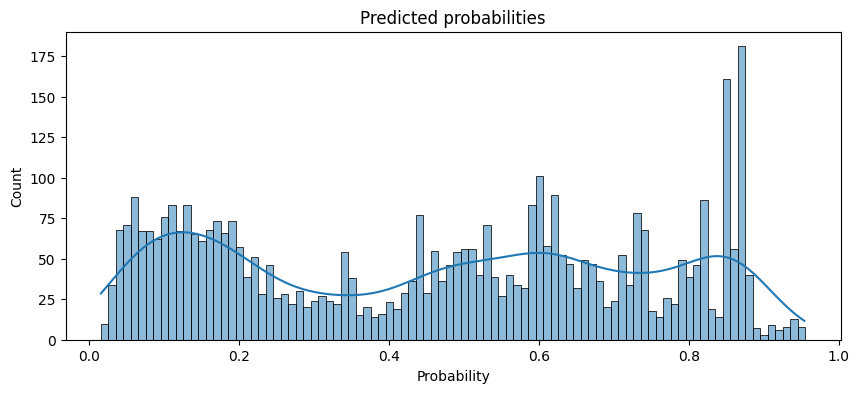

In [345]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

Del gráfico podemos observar que la cantidad de veces que la validación cruzada predijo una probabilidad del 88-90% es al rededor de 160. Es decir, en 160 clases se predice con un 88-90% de probabilidad.

En conclusión, podemos observar que los métodos que mejor predicen el conjunto trabajado serán RandomForest y KNN. Se puede potenciar su robustez medinate la validación cruzada, observando una mayor exactitud en cuanto a la predicción de cuantos pasajeros fueron transportados.